# **Principal Component Analysis (PCA)**

**Importing Dependencies**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Loading Dataset**

In [27]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/digits.csv")
df.shape

(42000, 785)

In [28]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting Features and Target, Train Test Dataset Splitting**

In [29]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X.shape, X_train.shape, X_test.shape)

(42000, 784) (33600, 784) (8400, 784)


**KNN Classifier**

In [31]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on test dataset: {accuracy:.2%}")

Accuracy on test dataset: 96.49%


**Principal Component Analysis**

In [33]:
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**n_components = 100**

In [35]:
pca = PCA(n_components=100)

In [36]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [37]:
print(X_train_trf.shape, X_test_trf.shape)

(33600, 100) (8400, 100)


In [38]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_trf, Y_train)

KNeighborsClassifier()

In [39]:
Y_pred = knn1.predict(X_test_trf)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {accuracy:.2%}")

Accuracy score: 95.44%


**n_components = 250**

In [40]:
pca = PCA(n_components=250)

In [41]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [42]:
print(X_train_trf.shape, X_test_trf.shape)

(33600, 250) (8400, 250)


In [43]:
knn2 = KNeighborsClassifier()
knn2.fit(X_train_trf, Y_train)

KNeighborsClassifier()

In [44]:
Y_pred = knn2.predict(X_test_trf)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {accuracy:.2%}")

Accuracy score: 94.86%


**Visualization in 2D**

In [45]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [46]:
import plotly.express as px
Y_train_trf = Y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0], y=X_train_trf[:,1], color=Y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

**Visualization in 3D**

In [47]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [48]:
Y_train_trf = Y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2], color=Y_train_trf)
fig.update_layout(margin=dict(l=20, r=20, b=20, t=20))
fig.show()

In [49]:
# Eigen Values
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621])

In [51]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [50]:
# Eigen Vectors
print(pca.components_.shape)

(3, 784)


**Selecting Optimum Number of Features**

In [52]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [53]:
pca.components_.shape

(784, 784)

In [55]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [57]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_explained_variance

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

In [79]:
num_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print("Number of components: ", num_components)

Number of components:  223


Text(0, 0.5, 'Cumulative Explained Variance')

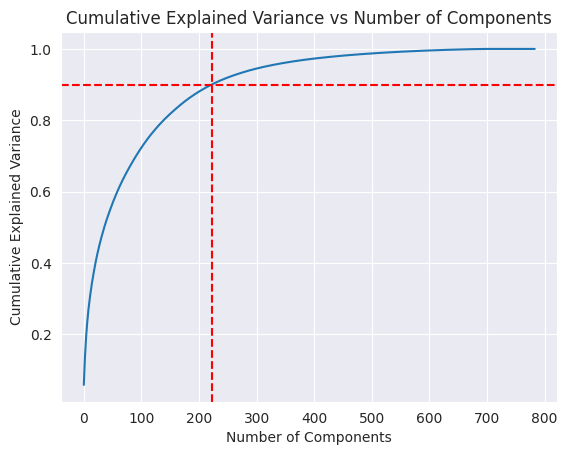

In [80]:
plt.plot(cumulative_explained_variance)
plt.axhline(0.9, color='red', linestyle='--')
plt.axvline(num_components, color='red', linestyle='--')
plt.title("Cumulative Explained Variance vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")